In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os

import matplotlib as mpl
import pandas as pd
import jaxley as jx
from jaxley.channels import HH
import jax.numpy as jnp
from jax import jit, vmap
from nex.mnist.utils import gen_data
import pickle
from nex.colors import cols as papercols

In [40]:
dt = 0.025
t_max = 7.0
time_vec = np.arange(0, t_max+2*dt, dt)

In [41]:
comp = jx.Compartment()
comp.insert(HH())

comp.record()

comp.set("v", -65.0)
comp.init_states()

Added 1 recordings. See `.recordings` for details.


In [42]:
vs = []

for i_amp in [0.01, 0.02, 0.05]:
    stim = jx.step_current(1.0, 1.0, i_amp, dt, t_max)
    comp.delete_stimuli()
    comp.stimulate(stim)
    v = jx.integrate(comp)
    vs.append(v)

v = np.concatenate(vs)

Added 1 stimuli. See `.currents` for details.
Added 1 stimuli. See `.currents` for details.
Added 1 stimuli. See `.currents` for details.


### Error figure

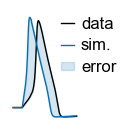

In [51]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.9, 1.4))
    _ = ax.plot(time_vec, v[0], c=papercols["data"], linewidth=1.0)
    _ = ax.plot(time_vec, v[2], c=papercols["jaxley"], linewidth=1.0)
    _ = ax.fill_between(time_vec, v[0], v[2], color=papercols["jaxley_shades"][2], alpha=0.3)
    _ = ax.set_ylim([-80, 50])
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    ax.legend(["data", "sim.", "error"], loc="upper right", bbox_to_anchor=[1.74, 1.1, 0.0, 0.0], fontsize=12.0, handlelength=0.8, handleheight=0.4, handletextpad=0.4, labelspacing=0.4)
    
    plt.savefig("../svg/error_traces.svg", bbox_inches="tight", transparent=True)    
    plt.show()

### Visualize box stimuli

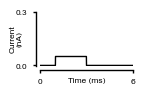

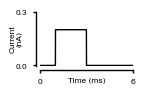

In [13]:
dt = 0.001
t_max = 6.0
time_vec = np.arange(0, t_max+2*dt, dt)
i_amps = [1.0, 4.0]

for i, i_amp in enumerate(i_amps):
    stim = jx.step_current(1.0, 2.0, i_amp * 0.05, dt, t_max)
    
    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(1, 1, figsize=(1.2, 0.7))
        _ = ax.plot(time_vec[:-1], stim, c="k")
        _ = ax.set_ylim([-0.002, 0.3])
        _ = ax.set_yticks([0, 0.3])
        _ = ax.set_xticks([0, 6])
        _ = ax.set_xlim([0, 6])
        _ = ax.set_ylabel("Current\n(nA)", labelpad=-5)
        _ = ax.set_xlabel("Time (ms)", labelpad=-5)
        
        # Set a small displacement for the spines
        ax.spines['bottom'].set_position(('outward', 3))
        ax.spines['left'].set_position(('outward', 3))
        plt.savefig(f"../svg/stim_{i}.svg", bbox_inches="tight", transparent=True)
        plt.show()

### Morphologies

In [19]:
names = []
for x in os.walk("../../../nex/ca1net/morphologies"):
    if len(x[0]) < 45 and len(x[0]) > 35:
        names.append(x[0])
        fnames = [f"{n}/{n[-4:]}.CNG.swc" for n in names]

inds = [1, 3, 4, 5, 7, 8, 9, 11]
cells = [jx.read_swc(fnames[i], 1, max_branch_len=500.0) for i in inds]
net = jx.Network(cells)

net.cell(0).move(0, 450, 0)
net.cell(1).move(600, 250, 0)
net.cell(2).move(1100, 350, 0)
net.cell(3).move(350, 1000, 0)
net.cell(4).move(950, 900, 0)
net.cell(5).move(1250, 1200, 0)
net.cell(6).move(700, 1400, 0)
net.cell(7).move(0, 1300, 0)

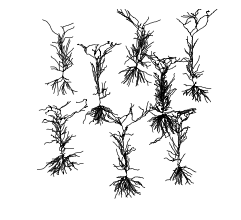

In [25]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(3 / 2100 * 2000, 3 / 2300 * 2000))
    ax = net.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.4})
    _ = ax.set_xlim([-500, 1600])
    _ = ax.set_ylim([-100, 2000])
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig(f"../svg/morphs.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [26]:
names = []
for x in os.walk("../../../nex/ca1net/morphologies"):
    if len(x[0]) < 45 and len(x[0]) > 35:
        names.append(x[0])
        fnames = [f"{n}/{n[-4:]}.CNG.swc" for n in names]

inds = [1, 3, 4, 5, 7, 8, 9, 11]
cells = [jx.read_swc(fnames[i], 1, max_branch_len=500.0) for i in inds]
net = jx.Network(cells)

net.cell(0).move(0, 900, 0)
net.cell(1).move(1200, 500, 0)
net.cell(2).move(2200, 700, 0)
net.cell(3).move(700, 2000, 0)
net.cell(4).move(1900, 1800, 0)
net.cell(5).move(2500, 2400, 0)
net.cell(6).move(1400, 2800, 0)
net.cell(7).move(0, 2600, 0)

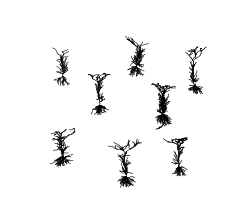

In [28]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(3 / 2100 * 2000, 3 / 2300 * 2000))
    ax = net.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.4})
    _ = ax.set_xlim([-1000, 3200])
    _ = ax.set_ylim([-200, 4000])
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig(f"../svg/morphs.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Visualize MNIST images

In [12]:
n_test = 10

with open("../mnist/results/mnist_data.pickle", "rb") as handle:
    mnist = pickle.load(handle)

_ = np.random.seed(0)
flat_images = jnp.reshape(mnist["train"]["image"], (60_000, 28*28))
labels = mnist["train"]["label"]

class1 = 5
class2 = 3
test_images, test_labels = gen_data(class1, class2, flat_images, labels, n_test, 4_500)

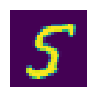

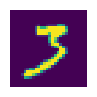

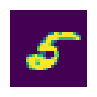

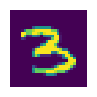

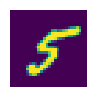

In [13]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    for i in range(5):
        fig, ax = plt.subplots(1, 1, figsize=(1, 1))
        _ = ax.imshow(np.reshape(test_images[i], (28, 28)))
        _ = ax.spines["left"].set_visible(False)
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.set_xticks([])
        _ = ax.set_yticks([])
        plt.savefig(f"results/figs/fig0/svg/mnist_{i}.png", bbox_inches="tight")
        plt.show()